In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [68]:
df = pd.read_csv('House Data_Pune.csv')
df.sample(10)

,area_type,location,Society,size,Baths,total_sqft,price,availability,Unnamed: 8,Unnamed: 9
1266,NaN,Swargate,NaN,3 bhk,2.0,1820,86.00,NaN,NaN,NaN
516,Super built-up Area,Katraj,NaN,2 bhk,2.0,1020,30.60,18-Jul,NaN,NaN
159,Super Built-up Area,Bibwewadi,Mahesh Society,2 bhk,2.0,800,65.00,Ready to Move,NaN,NaN
558,Built-up Area,Katraj,NaN,3 bhk,3.0,1783,115.00,Ready To Move,NaN,NaN
899,NaN,Katraj,NaN,3 bhk,3.0,1804,120.00,NaN,NaN,NaN
161,Super Built-up Area,Padmavati,Padmavati apartment,2 bhk,2.0,1050,110.00,Ready to move,NaN,NaN
1353,NaN,Katraj,NaN,2 bhk,2.0,1153,57.00,NaN,NaN,NaN
1408,NaN,Bibwewadi,NaN,3 bhk,3.0,2376,203.00,NaN,NaN,NaN
389,Super built-up Area,Bibwewadi,NaN,2 bhk,2.0,1151,48.77,17-Oct,NaN,NaN
1249,NaN,Dhankawadi,NaN,3 bhk,3.0,1790,100.00,NaN,NaN,NaN


In [3]:
df.shape

(1629, 10)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area           56
Built-up Area           175
Built-up area             4
Carpet Area               3
Plot  Area               42
Plot Area                21
Super Built-up Area     152
Super built-up  Area    193
Villa                     1
Name: area_type, dtype: int64

In [5]:
df1 = df.drop(['area_type', 'Society', 'availability', 'Unnamed: 8', 'Unnamed: 9'], axis='columns')
df1.head()

,location,size,Baths,total_sqft,price
0,Bavdhan,2 bhk,2.0,640,55.96
1,Sus,2 bhk,2.0,690-720,45.00
2,Tathawade,2 bhk,2.0,688-693,60.00
3,Koregaon Park,3 bhk,3.0,1659,210.00
4,Sinhgad Road,3 bhk,3.0,1450,78.00


### Data Cleaning : Handling null values

In [6]:
df1.isnull().sum()

location       0
size           3
Baths         13
total_sqft     1
price          0
dtype: int64

In [7]:
df2 = df1.dropna()
df2.isna().sum()

location      0
size          0
Baths         0
total_sqft    0
price         0
dtype: int64

In [8]:
df2.shape

(1616, 5)

### Feature Engineering

#### Add new feature (integer) for bhk

In [9]:
df2['size'].unique()

array(['2 bhk', '3 bhk', '1 bhk', '4 bhk', '5 bhk', '1 RK', '10 bhk',
       '6 bhk', '7 bhk', '3', '1 rk', '1 Rk', '8 bhk', '1  bhk', '11 bhk',
       '9 bhk'], dtype=object)

In [10]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-10-f37298b81bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,Baths,total_sqft,price,bhk
0,Bavdhan,2 bhk,2.0,640,55.96,2
1,Sus,2 bhk,2.0,690-720,45.00,2
2,Tathawade,2 bhk,2.0,688-693,60.00,2
3,Koregaon Park,3 bhk,3.0,1659,210.00,3
4,Sinhgad Road,3 bhk,3.0,1450,78.00,3


In [11]:
df2['bhk'].unique()

array([ 2,  3,  1,  4,  5, 10,  6,  7,  8, 11,  9], dtype=int64)

In [12]:
df2[df2.bhk>9]

,location,size,Baths,total_sqft,price,bhk
95,Koregaon Park,10 bhk,10.0,10000,1800.0,10
1089,Dhankawadi,11 bhk,9.0,5000,360.0,11


In [13]:
df2.total_sqft.unique()

array(['640', '690-720 ', '688-693 ', '1659', '1450', '1300', '850-950 ',
       '1080', '650-750 ', '645-716 ', '346-384 ', '627-628 ', '573-606 ',
       '850', '660', '500', '1140', '1020', '905', '1800', '1050', '2100',
       '607', '605', '1620', '6000', '680', '865-1168 ', '350', '970',
       '750', '1200', '450', '550', '635', '915', '460', '608', '1000',
       '580', '1600', '950', '530', '525', '400', '820', '1109', '570',
       '975', '633', '2500', '2600', '625', '1170', '2269', '2639', '620',
       '667', '900', '2710', '1090', '601', '380', '930', '715', '420',
       '2400', '494', '860', '600', '1250', '9440', '1270', '1610',
       '5500', '2000', '2300', '1185', '10000', '1180', '1100', '1079',
       '3000', '1500', '6280', '1054', '504', '1743.75', '661', '305',
       '1431.6', '757', '835', '926', '914', '700', '822', '253', '1060',
       '506', '720', '733', '800', '3065', '470', '718', '2308', '810',
       '1106', '455', '1175-1748', '1309-1431', '1271', '

##### From above observations, we can see that the range of values in total_sqft column. For such case we can just take average of min and max value in the range.

In [14]:
def sqft_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
sqft_range_to_num('1339')

1339.0

In [16]:
sqft_range_to_num('1042 - 1105')

1073.5

In [17]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(sqft_range_to_num)
df3.head()

,location,size,Baths,total_sqft,price,bhk
0,Bavdhan,2 bhk,2.0,640.0,55.96,2
1,Sus,2 bhk,2.0,705.0,45.00,2
2,Tathawade,2 bhk,2.0,690.5,60.00,2
3,Koregaon Park,3 bhk,3.0,1659.0,210.00,3
4,Sinhgad Road,3 bhk,3.0,1450.0,78.00,3


### Feature Engineering

#### Add new feature called Price per square feet

In [18]:
df4 = df3.copy()
df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft']
df4.head()

,location,size,Baths,total_sqft,price,bhk,price_per_sqft
0,Bavdhan,2 bhk,2.0,640.0,55.96,2,8743.750000
1,Sus,2 bhk,2.0,705.0,45.00,2,6382.978723
2,Tathawade,2 bhk,2.0,690.5,60.00,2,8689.355539
3,Koregaon Park,3 bhk,3.0,1659.0,210.00,3,12658.227848
4,Sinhgad Road,3 bhk,3.0,1450.0,78.00,3,5379.310345


#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [19]:
df4['location'] = df4['location'].apply(lambda x: x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Bibwewadi               242
Katraj                  198
Dhankawadi              197
Swargate                133
Koregaon Park           125
Sinhgad Road            110
Shivaji Nagar           101
Hadapsar                 87
Karve Nagar              71
Baner                    45
Balaji Nagar             41
FC Road                  32
Kondhwa                  31
AB Chowk                 30
Ambegaon                 24
Amanora Town             21
Padmavati                13
Deccan Gymkhana          11
Camp                     11
Bund Garden              11
Budhwar Peth             11
Kothrud                  10
Market yard              10
Pune Railway Station     10
Sahakar Nagar            10
Model colony              8
Bavdhan                   3
Amanora town              2
Hinjewadi                 2
Meera nagar               2
Sus                       2
Vitthal nagar             1
Vighnaharta Nagar         1
Tathawade                 1
Shivraj Nagar             1
Moshi      

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [20]:
len(location_stats[location_stats<=10])

22

In [21]:
location_stats_less_than10 = location_stats[location_stats<=10]
location_stats_less_than10

location
Kothrud                 10
Market yard             10
Pune Railway Station    10
Sahakar Nagar           10
Model colony             8
Bavdhan                  3
Amanora town             2
Hinjewadi                2
Meera nagar              2
Sus                      2
Vitthal nagar            1
Vighnaharta Nagar        1
Tathawade                1
Shivraj Nagar            1
Moshi                    1
Samarth Nagar            1
Kundalahalli             1
Mohan Nagar              1
Kanchan Nagari           1
Manjri                   1
Mangdewadi               1
Wakad                    1
Name: location, dtype: int64

In [22]:
len(df4.location.unique())

43

In [23]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than10 else x)
len(df4.location.unique())

22

In [24]:
df4.head()

,location,size,Baths,total_sqft,price,bhk,price_per_sqft
0,other,2 bhk,2.0,640.0,55.96,2,8743.750000
1,other,2 bhk,2.0,705.0,45.00,2,6382.978723
2,other,2 bhk,2.0,690.5,60.00,2,8689.355539
3,Koregaon Park,3 bhk,3.0,1659.0,210.00,3,12658.227848
4,Sinhgad Road,3 bhk,3.0,1450.0,78.00,3,5379.310345


## Outlier Removal using Business Logic

As a Data Scientist when we have conversation with our Business Manager (who has expertise in real estate), he will tell us that normally square feet per bedroom is 300 (i.e. 2bhk apartment is having minimum 600sqft). If we have less than that then we have to remove that case causing errors. We will remove such outliers by keeping minimum threshold per bhk to be 300sqft.

In [25]:
df4[df4.total_sqft/df4.bhk<300]

,location,size,Baths,total_sqft,price,bhk,price_per_sqft
13,Baner,2 bhk,2.0,589.5,69.0,2,11704.834606
100,other,7 bhk,7.0,1100.0,110.0,7,10000.000000
101,other,5 bhk,3.0,1000.0,110.0,5,11000.000000
102,Hadapsar,5 bhk,3.0,1079.0,61.0,5,5653.382762
103,Hadapsar,5 bhk,5.0,1000.0,72.0,5,7200.000000
...,...,...,...,...,...,...,...
1576,Sinhgad Road,4 bhk,3.0,1080.0,155.0,4,14351.851852
1586,Hadapsar,4 bhk,4.0,700.0,72.0,4,10285.714286
1591,Ambegaon,3 bhk,4.0,600.0,95.0,3,15833.333333
1606,Dhankawadi,6 bhk,4.0,1200.0,225.0,6,18750.000000


In [26]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(1533, 7)

## Outlier Removal Using Standard Deviation and Mean

In [27]:
df5.price_per_sqft.describe()

count     1533.000000
mean      6610.855214
std       3345.276378
min        371.428571
25%       4444.444444
50%       5681.818182
75%       7550.200803
max      30000.000000
Name: price_per_sqft, dtype: float64

##### Here we find that min price per sqft is 371 rs/sqft whereas max is 30000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [28]:
def remove_pps_outliers(dd):
    dd_out = pd.DataFrame()
    for key, subdd in dd.groupby('location'):
        m = np.mean(subdd.price_per_sqft)
        st = np.std(subdd.price_per_sqft)
        reduced_dd = subdd[(subdd.price_per_sqft>(m-st)) & (subdd.price_per_sqft<=(m+st))]
        dd_out = pd.concat([dd_out,reduced_dd],ignore_index=True)
    return dd_out
df6 = remove_pps_outliers(df5)
df6.shape

(1208, 7)

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

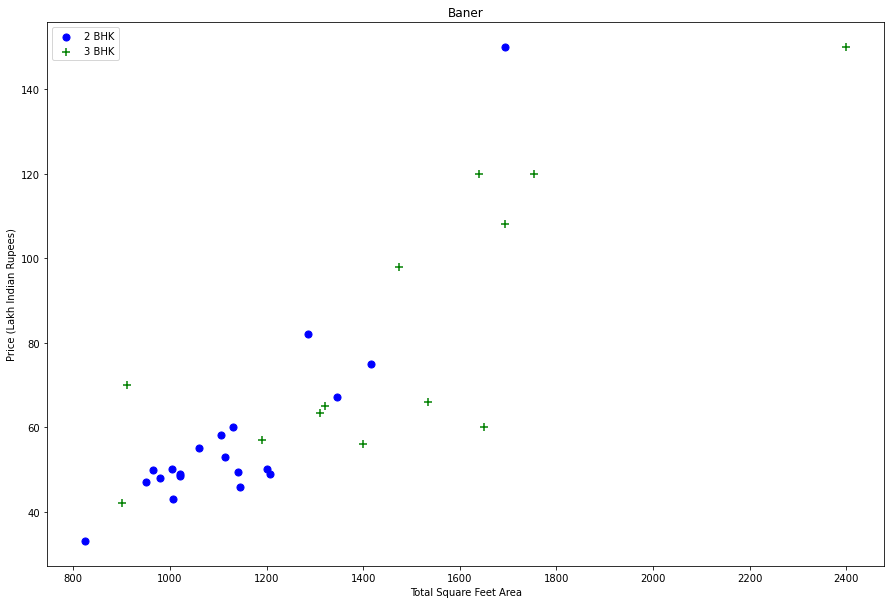

In [29]:
def plot_scatter_chart(dd,location):
    bhk2 = dd[(dd.location==location) & (dd.bhk==2)]
    bhk3 = dd[(dd.location==location) & (dd.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Baner")

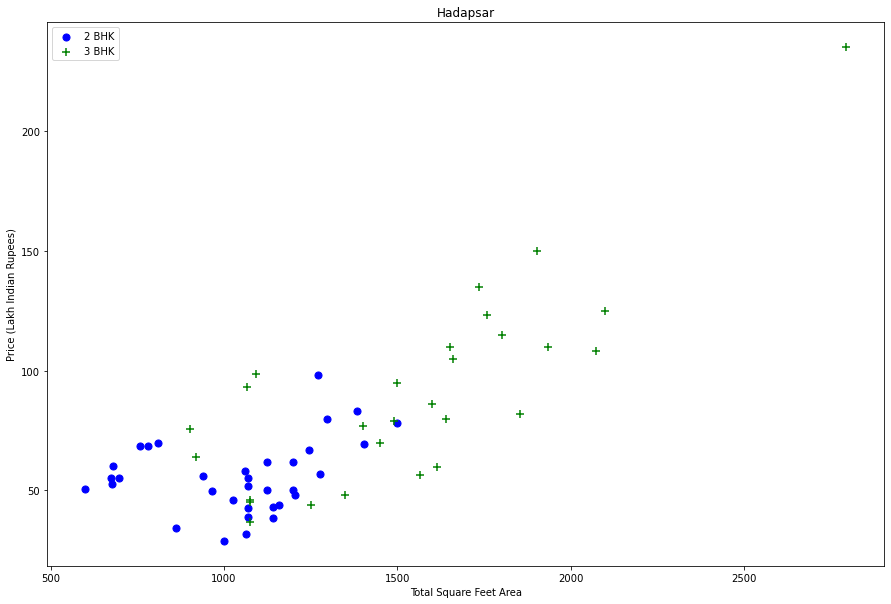

In [30]:
plot_scatter_chart(df6,"Hadapsar")

We should also remove the properties for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [31]:
def remove_bhk_outliers(dd):
    exclude_indices = np.array([])
    for location, location_dd in dd.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_dd in location_dd.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_dd.price_per_sqft),
                'std': np.std(bhk_dd.price_per_sqft),
                'count': bhk_dd.shape[0]
            }
        for bhk, bhk_dd in location_dd.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_dd[bhk_dd.price_per_sqft<(stats['mean'])].index.values)
    return dd.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(859, 7)

#### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

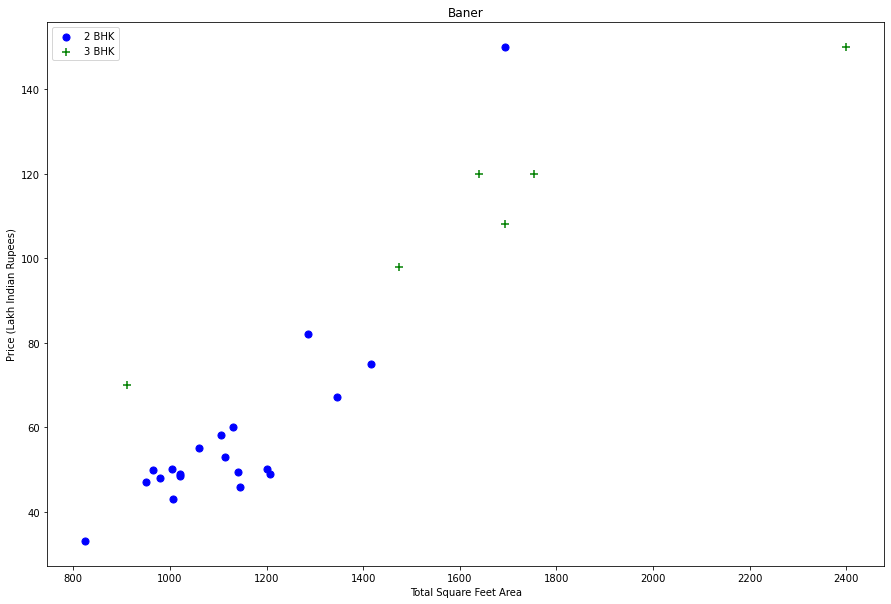

In [32]:
plot_scatter_chart(df7,"Baner")

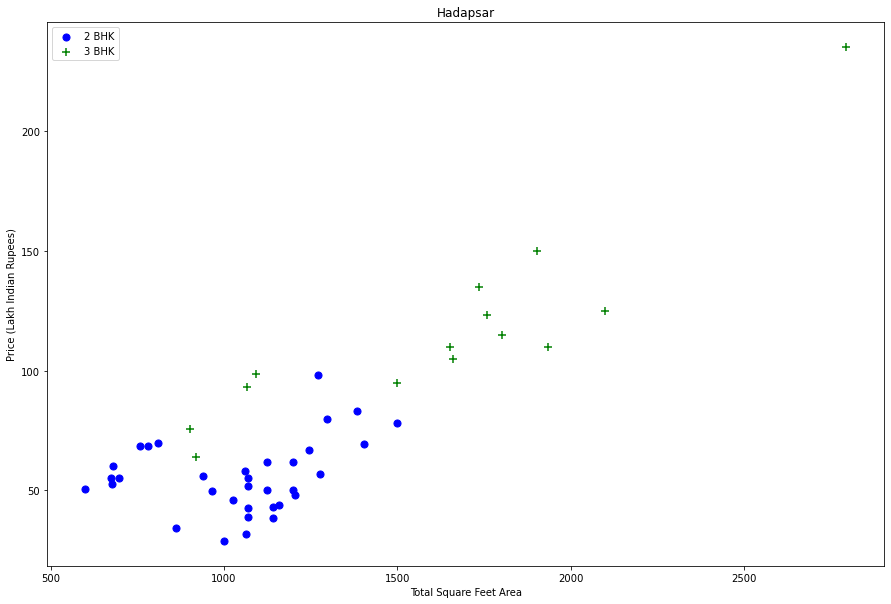

In [33]:
plot_scatter_chart(df7,"Hadapsar")

Text(0, 0.5, 'Count')

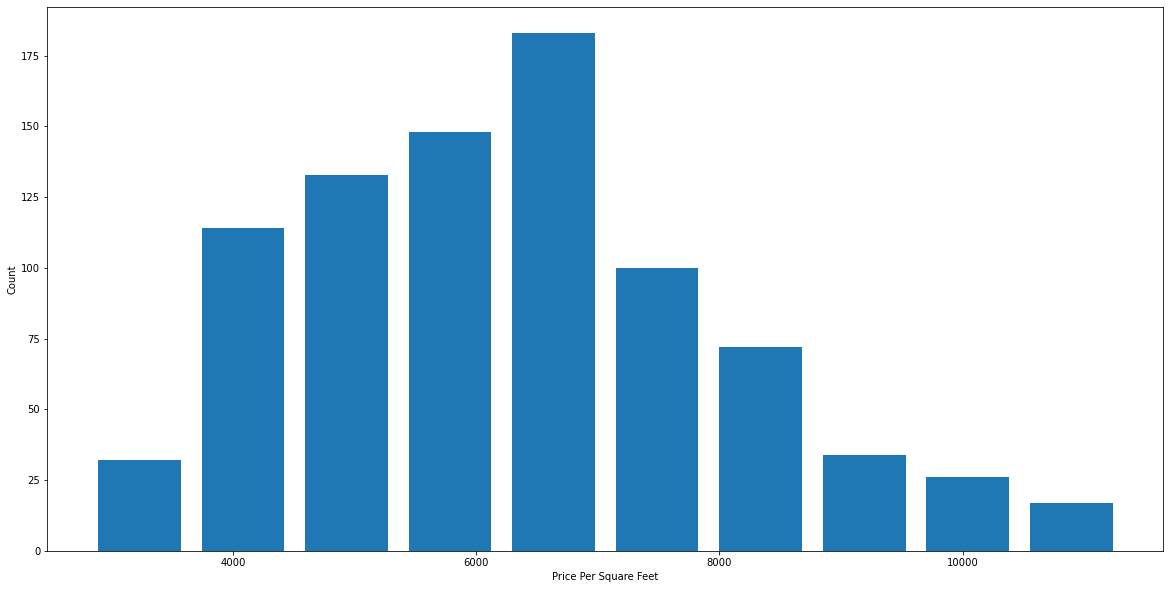

In [34]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## Outlier Removal Using Bathrooms Feature

In [35]:
df7.Baths.unique()

array([2., 1., 3., 4., 5., 7., 6., 8., 9.])

Text(0, 0.5, 'Count')

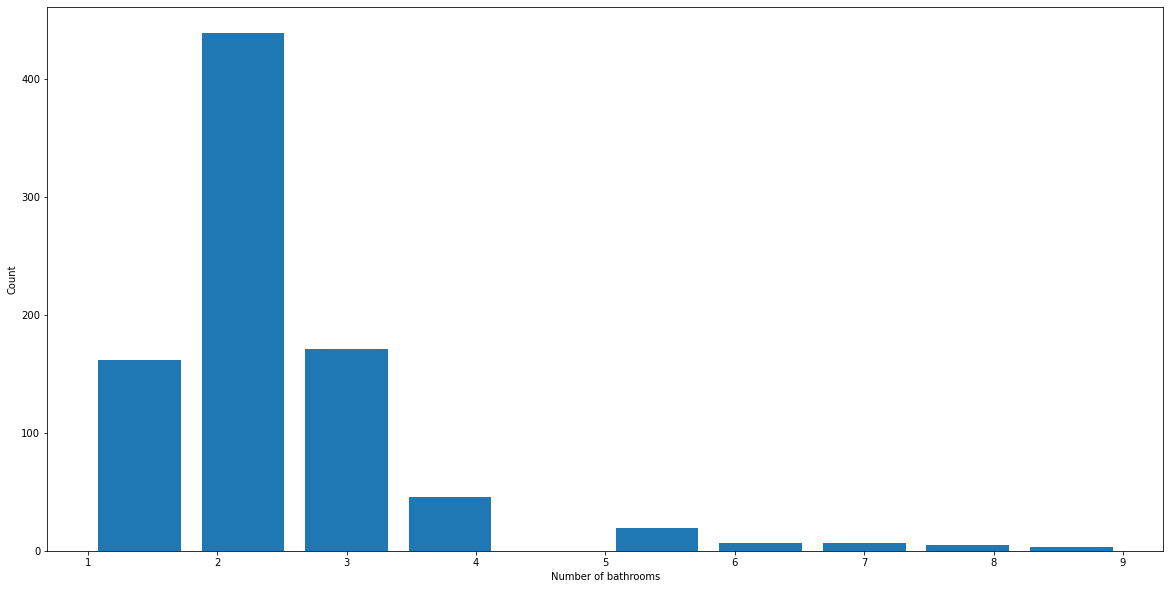

In [36]:
plt.hist(df7.Baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [37]:
df7[df7.Baths>7]

,location,size,Baths,total_sqft,price,bhk,price_per_sqft
396,Dhankawadi,8 bhk,8.0,3000.0,140.0,8,4666.666667
405,Dhankawadi,8 bhk,8.0,5000.0,250.0,8,5000.000000
441,Dhankawadi,11 bhk,9.0,5000.0,360.0,11,7200.000000
718,Katraj,8 bhk,8.0,2600.0,180.0,8,6923.076923
767,Kondhwa,8 bhk,8.0,5000.0,250.0,8,5000.000000
867,Koregaon Park,9 bhk,9.0,4125.0,265.0,9,6424.242424
886,Padmavati,8 bhk,8.0,3000.0,140.0,8,4666.666667
1104,Swargate,9 bhk,9.0,5000.0,210.0,9,4200.000000


It is unusual to have 1 more bathrooms than number of bedrooms in a home

In [38]:
df7[df7.Baths>df7.bhk+2]

,location,size,Baths,total_sqft,price,bhk,price_per_sqft


Again the business manager has a conversation with us (i.e. a data scientist) that if we have 4 bedroom home and even if we have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [39]:
df8 = df7[df7.Baths<df7.bhk+2]
df8.shape

(853, 7)

In [40]:
df8.head()

,location,size,Baths,total_sqft,price,bhk,price_per_sqft
0,AB Chowk,2 bhk,2.0,1143.0,45.000,2,3937.007874
1,AB Chowk,1 bhk,1.0,600.0,38.000,1,6333.333333
2,AB Chowk,2 bhk,2.0,950.0,57.000,2,6000.000000
3,AB Chowk,2 bhk,2.0,1073.5,54.005,2,5030.740568
5,AB Chowk,2 bhk,2.0,1148.0,60.000,2,5226.480836


In [41]:
df9 = df8.drop(['size', 'price_per_sqft'], axis='columns')
df9.head()

,location,Baths,total_sqft,price,bhk
0,AB Chowk,2.0,1143.0,45.000,2
1,AB Chowk,1.0,600.0,38.000,1
2,AB Chowk,2.0,950.0,57.000,2
3,AB Chowk,2.0,1073.5,54.005,2
5,AB Chowk,2.0,1148.0,60.000,2


## Use One Hot Encoding For Location

To convert the column location from categorical into numerical format we are using one hot encoding

In [42]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,AB Chowk,Amanora Town,Ambegaon,Balaji Nagar,Baner,Bibwewadi,Budhwar Peth,Bund Garden,Camp,Deccan Gymkhana,...,Hadapsar,Karve Nagar,Katraj,Kondhwa,Koregaon Park,Padmavati,Shivaji Nagar,Sinhgad Road,Swargate,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df10 = pd.concat([df9, dummies.drop('other',axis='columns')], axis='columns')
df10.head()

,location,Baths,total_sqft,price,bhk,AB Chowk,Amanora Town,Ambegaon,Balaji Nagar,Baner,...,FC Road,Hadapsar,Karve Nagar,Katraj,Kondhwa,Koregaon Park,Padmavati,Shivaji Nagar,Sinhgad Road,Swargate
0,AB Chowk,2.0,1143.0,45.000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AB Chowk,1.0,600.0,38.000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AB Chowk,2.0,950.0,57.000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AB Chowk,2.0,1073.5,54.005,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AB Chowk,2.0,1148.0,60.000,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df10.shape

(853, 26)

In [45]:
df11 = df10.drop(['location'], axis='columns')
df11.shape

(853, 25)

## Model Building

In [46]:
X = df11.drop(['price'], axis='columns')
X.shape

(853, 24)

In [47]:
y = df11.price
y.head()

0    45.000
1    38.000
2    57.000
3    54.005
5    60.000
Name: price, dtype: float64

In [48]:
y.shape

(853,)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8764298186298418

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79556763, 0.80615298, 0.85066324, 0.84201353, 0.85224093])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X.values,y.values)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\mruge\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\mruge\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.829328,{'normalize': True}
1,lasso,0.812054,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.784659,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [53]:
X.columns

Index(['Baths', 'total_sqft', 'bhk', 'AB Chowk', 'Amanora Town', 'Ambegaon',
       'Balaji Nagar', 'Baner', 'Bibwewadi', 'Budhwar Peth', 'Bund Garden',
       'Camp', 'Deccan Gymkhana', 'Dhankawadi', 'FC Road', 'Hadapsar',
       'Karve Nagar', 'Katraj', 'Kondhwa', 'Koregaon Park', 'Padmavati',
       'Shivaji Nagar', 'Sinhgad Road', 'Swargate'],
      dtype='object')

In [54]:
def price_predict(location,area,bath,bhk):
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = area
    x[2] = bhk
    if location !='other':
        x[np.where(X.columns == location)[0][0]] = 1
    return lr_clf.predict([x])[0]


In [55]:
price_predict('Hadapsar', 800, 2, 2)

C:\Users\mruge\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


44.91922101959534

In [56]:
price_predict('Koregaon Park', 1200, 3, 3)

C:\Users\mruge\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


73.40040860663606

In [57]:
price_predict('Koregaon Park', 800, 2, 2)

C:\Users\mruge\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


47.29444640167131

In [58]:
price_predict('Koregaon Park', 800, 3, 2)

C:\Users\mruge\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.70742657714971

In [59]:
import pickle
pickle.dump(lr_clf,open('model.pkl','wb'))
pickle.dump(X,open('df.pkl','wb'))

In [60]:
area_loc = list(df10['location'].unique())
area_loc

['AB Chowk',
 'Amanora Town',
 'Ambegaon',
 'Balaji Nagar',
 'Baner',
 'Bibwewadi',
 'Budhwar Peth',
 'Bund Garden',
 'Camp',
 'Deccan Gymkhana',
 'Dhankawadi',
 'FC Road',
 'Hadapsar',
 'Karve Nagar',
 'Katraj',
 'Kondhwa',
 'Koregaon Park',
 'Padmavati',
 'Shivaji Nagar',
 'Sinhgad Road',
 'Swargate',
 'other']

In [61]:
pickle.dump(area_loc, open('location.pkl', 'wb'))

In [62]:
columns = {'columns':[x.lower() for x in X.columns]}

In [63]:
#pickle.dump(columns,open('loacation.pkl','wb'))

In [64]:
dummies.columns

Index(['AB Chowk', 'Amanora Town', 'Ambegaon', 'Balaji Nagar', 'Baner',
       'Bibwewadi', 'Budhwar Peth', 'Bund Garden', 'Camp', 'Deccan Gymkhana',
       'Dhankawadi', 'FC Road', 'Hadapsar', 'Karve Nagar', 'Katraj', 'Kondhwa',
       'Koregaon Park', 'Padmavati', 'Shivaji Nagar', 'Sinhgad Road',
       'Swargate', 'other'],
      dtype='object')

In [65]:
columns

{'columns': ['baths',
  'total_sqft',
  'bhk',
  'ab chowk',
  'amanora town',
  'ambegaon',
  'balaji nagar',
  'baner',
  'bibwewadi',
  'budhwar peth',
  'bund garden',
  'camp',
  'deccan gymkhana',
  'dhankawadi',
  'fc road',
  'hadapsar',
  'karve nagar',
  'katraj',
  'kondhwa',
  'koregaon park',
  'padmavati',
  'shivaji nagar',
  'sinhgad road',
  'swargate']}